<h1>Convolutional Neural Networks (CNNs) </h1> 


<h3 style="color: yellow;">This tutorial focuses on building a CNN based on the CIFAR-10 dataset using PyTorch. </h3>

<h3 style="color: yellow;">}The CIFAR-10 dataset consists of 60,000 samples divided into 10 classes, with 6,000 samples for each class. Out of these, 5,000 samples are used for training, and 10,000 samples are reserved for testing.</h3>

<h3 style="color: yellow;">The objective is to design a CNN capable of classifying the images within the dataset.</h3>

<h3 style="color: yellow;">CNNs, also known as conv nets, share similarities with ordinary neural networks, as they consist of learnable weights and biases in the form of neurons.</h3>

<h3 style="color: yellow;">However, CNNs, a.k.a conv nets, stand apart from ordinary neural networks due to their primary usage in image data analysis and applie so-called convolutional filters.</h3>

<h3 style="color: yellow;">CNNs are most renowned for their application to image data, owing to their exceptional capability to capture spatial hierarchies and intricate patterns.</h3>




<h1>CNNs Architectures </h1> 

<h3 style="color: yellow;">CNNs encompass several layers to learn different levels of abstract representations by applying convolutional filters.</h3>

<h3 style="color: yellow;">Remember: Activation functions are optional but necessary to introduce the non-linearity property to the model's learning process.</h3>


<div style="display: flex; justify-content: center;">
    <img src='convnet.png', width =800>
</div>



<h1> Convolutional Layer</h1> 

<h3 style="color: yellow;">Convolutional filters work by applying convolutional kernels to image batches, giving convolutional networks an inductive bias towards local patterns.</h3>


<div style="display: flex; justify-content: center;">
    <img src='convfilter.png', width =800>
</div>

<h3 style="color: yellow;">The filter is placed in the top-left corner, and we compute the output value using the dot product. Then, we slide the filter to the next position to the right or to the bottom.</h3>

<h3 style="color: yellow;">The following formula is used to determine the size of the resulting image after the convolution:</h3>


$$
\Large \color{lightgreen}\text{Output size} = \frac{\text{Input size} - \text{Kernel size} + 2 \times \text{Padding}}{\text{Stride}} + 1
$$

<h3 style="color: yellow;">The resulting image usually comes with a smaller size, and in some cases, the kernel cannot fit to the image's corners, especially in rectangular images. To address this, we use the padding technique to fill the boundary with zeros, allowing the kernel to fit the size.</h3>


<div style="display: flex; justify-content: center;">
    <img src='padding.png', width =800>
</div>

<h1> Max Pooling</h1> 

<h3 style="color: yellow;">Max pooling is used to down-sample the resulting image by applying a max-value filter on local image patches.</h3>

<h3 style="color: yellow;">Max pooling is employed to reduce computational cost by decreasing the size of the image, thereby reducing the required parameters and avoiding overfitting.</h3>


<div style="display: flex; justify-content: center;">
    <img src='maxpooling.png', width =700>
</div>


<h3 style="color: yellow;">Other kinds of pooling include average pooling and global average pooling.</h3>


<h1>Why CNN is important for images:</h1>

<h3 style="color: yellow;">Local Inductive Bias:</h3>
<p style="color: lightgreen; font-size: 18px;">CNNs prioritize local patterns, aiding in recognizing features specific to image regions.</p>

<h3 style="color: yellow;">Parameter Sharing:</h3>
<p style="color: lightgreen; font-size: 18px;">A feature detector, like a vertical edge detector, beneficial in one image region is likely useful elsewhere, applying to both low-level and high-level features.</p>

<h3 style="color: yellow;">Sparsity of Connection:</h3>
<p style="color: lightgreen; font-size: 18px;">CNNs exhibit sparse connections, where an output unit relies on only a few input units, enhancing robustness and mitigating overfitting risks.</p>


In [1]:
# Importing libs
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np

/usr/lib/python3/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/lib/python3/dist-packages/torchvision/image.so: undefined symbol: _ZN3c107WarningC1ENS_7variantIJNS0_11UserWarningENS0_18DeprecationWarningEEEERKNS_14SourceLocationENSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEEb'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:

# device confi
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:

# Hyper-parameters
EPOCHs=10
BATCH_SIZE=32
LR=0.001

In [4]:
transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]) # The first tuple (0.5, 0.5, 0.5) corresponds to the mean values for each color channel, the same for teh second tuple for std

# Dataset and dataloader
train_dataset=CIFAR10(root='./data',train=True,
                      download=True,transform=transform)
test_dataset=CIFAR10(root='./data',train=False,download=True,transform=transform)

train_loader=DataLoader(dataset=train_dataset,batch_size=BATCH_SIZE,shuffle=True)

test_loader=DataLoader(dataset=test_dataset,batch_size=BATCH_SIZE,shuffle=False)

classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


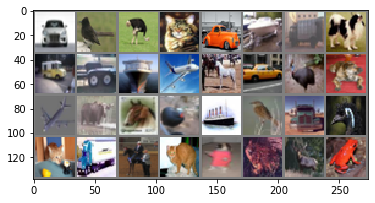

<Figure size 432x288 with 0 Axes>

In [5]:
# Plotting and saving images
def show_image(img):
     # Rescale pixel values to the range [0, 1] , in the topwe arrange them between -1,1
    img = img / 2 + 0.5 # the range is [-1,1], to move -1 to 0 >>-1/2 =-0.5+0.5 and so on of 1 vlaues
    np_image=img.numpy()
    plt.imshow(np.transpose(np_image,(1,2,0))) #  np.transpose to rearrange the dimensions of the image tensor. The dimensions are rearranged from (channels, height, width) to (height, width, channels) because matplotlib expects the last dimension to represent color channels.
    plt.show()

# get random images

dataiter=iter(train_loader)
images,labels=next(dataiter)
show_image(torchvision.utils.make_grid(images))
plt.savefig("/home/mohanad/learn/Pytorch/13- Convolutional Neural Networks /image_grid.png")

In [6]:

# Check the layer size after convolution operations
conv1=nn.Conv2d(3,6,5) # input_channels,out_channels,kernel_size
max_pool=nn.MaxPool2d(2,2)
conv2=nn.Conv2d(6,16,5)

print(f'The original batch of iamges shape: {images.shape}')
x=conv1(images)
print(f'The shape after conv1: {x.shape}')
x=max_pool(x)
print(f'The shape after the first max pooling: {x.shape}')
x=conv2(x)
print(f'The shape after conv2: {x.shape}')
x=max_pool(x)
print(f'The shape after the second max pooling: {x.shape}')

The original batch of iamges shape: torch.Size([32, 3, 32, 32])
The shape after conv1: torch.Size([32, 6, 28, 28])
The shape after the first max pooling: torch.Size([32, 6, 14, 14])
The shape after conv2: torch.Size([32, 16, 10, 10])
The shape after the second max pooling: torch.Size([32, 16, 5, 5])


In [7]:
# Convnet
class ConvNet(nn.Module):
    def __init__(self, *args, **kwargs):
        super(ConvNet,self).__init__(*args, **kwargs)
        self.conv1=nn.Conv2d(3,6,5) # 3=number of channels, 6= output channel 6, and 5= kernel size of 5 x 5
        self.maxpool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5) # the input channel size is the output channel size of conv1
        self.fc1=nn.Linear(16*5*5,200)
        self.fc2=nn.Linear(200,150)
        self.fc3=nn.Linear(150,10)

    def forward(self,x):
        # batch, 3, 32 , 32
        x=self.maxpool(F.relu(self.conv1(x)))  # batch, 6, 14 , 14
        x=self.maxpool(F.relu(self.conv2(x)))  # batch, 16, 5 , 5
        # FC layer require flatten data
        x=x.view(-1,16*5*5)                     # batch, 400
        x=F.relu(self.fc1(x))                   # batch, 200
        x=F.relu(self.fc2(x))                   # batch, 150
        x=self.fc3(x) # last layer should be without activattion fucntion it goes for softmax  # batch, 10
        
        return x

In [8]:
# Training loop
model=ConvNet().to(device)
loss=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(), lr=LR)

NUM_ITER_STEP=len(train_loader)

for epoch in range(EPOCHs):
    for i, (images,labels) in enumerate(train_loader):
        images=images.to(device)
        labels=labels.to(device)
        
        # forward pass
        outputs=model(images)
        loss_=loss(outputs,labels)
        
        # empty grad
        optimizer.zero_grad()
        loss_.backward()
        optimizer.step()


        if (i+1) %200 ==0:
            print(f'epoch [{epoch+1}/{EPOCHs}], Step [{i+1}/{NUM_ITER_STEP}] Loss {loss_.item():.3f}')
print("Training accomplished!")


epoch [1/10], Step [200/1563] Loss 2.308
epoch [1/10], Step [400/1563] Loss 2.313
epoch [1/10], Step [600/1563] Loss 2.311
epoch [1/10], Step [800/1563] Loss 2.298
epoch [1/10], Step [1000/1563] Loss 2.306
epoch [1/10], Step [1200/1563] Loss 2.304
epoch [1/10], Step [1400/1563] Loss 2.309
epoch [2/10], Step [200/1563] Loss 2.307
epoch [2/10], Step [400/1563] Loss 2.291
epoch [2/10], Step [600/1563] Loss 2.304
epoch [2/10], Step [800/1563] Loss 2.305
epoch [2/10], Step [1000/1563] Loss 2.290
epoch [2/10], Step [1200/1563] Loss 2.304
epoch [2/10], Step [1400/1563] Loss 2.295
epoch [3/10], Step [200/1563] Loss 2.301
epoch [3/10], Step [400/1563] Loss 2.297
epoch [3/10], Step [600/1563] Loss 2.301
epoch [3/10], Step [800/1563] Loss 2.301
epoch [3/10], Step [1000/1563] Loss 2.304
epoch [3/10], Step [1200/1563] Loss 2.296
epoch [3/10], Step [1400/1563] Loss 2.290
epoch [4/10], Step [200/1563] Loss 2.292
epoch [4/10], Step [400/1563] Loss 2.291
epoch [4/10], Step [600/1563] Loss 2.298
epoch [

In [9]:
# Inference
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for _ in range(10)]
    n_class_samples = [0 for _ in range(10)]
    
    for test_images, labels in test_loader:  # Changed 'images' to 'test_images'
        test_images = test_images.to(device)  # Changed 'images' to 'test_images'
        labels = labels.to(device)
        outputs = model(test_images)  # Changed 'images' to 'test_images'
        
        _, prediction = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (prediction == labels).sum().item()
        
        for i in range(test_images.size(0)): 
            label = labels[i].item()
            pred = prediction[i].item()
            if label == pred:
                n_class_correct[label] += 1
            n_class_samples[label] += 1
    acc = 100 * n_correct / n_samples
    print(f'The total accuracy of the model is: {acc:.2f}%')
    print('-' * 20)
    for i in range(10):
        acc = 100 * n_class_correct[i] / n_class_samples[i]
        print(f'The nested accuracy for {classes[i]}: {acc:.2f}%')


The total accuracy of the model is: 30.69%
--------------------
The nested accuracy for airplane: 47.10%
The nested accuracy for automobile: 35.60%
The nested accuracy for bird: 4.10%
The nested accuracy for cat: 6.10%
The nested accuracy for deer: 11.10%
The nested accuracy for dog: 25.50%
The nested accuracy for frog: 57.00%
The nested accuracy for horse: 39.50%
The nested accuracy for ship: 34.90%
The nested accuracy for truck: 46.00%
